<a href="https://colab.research.google.com/github/hijyun/music-recommedation-system-based-on-text/blob/main/data%26preprocessing/sad_romeo_word_cloud%26sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
import re

# 데이터 읽기

In [ ]:
f = open("data/sad_romeo.txt", 'r',encoding='utf-8')
lines = f.readlines()
f.close()

In [ ]:
lines[:10]

['aris\n',
 'Give me thy torch, boy. Hence, and stand aloof.\n',
 'Yet put it out, for I would not be seen.\n',
 'Under yond yew-trees lay thee all along\n',
 'Holding thine ear close to the hollow ground,\n',
 'So shall no foot upon the churchyard tread —\n',
 'Being loose, un-firm with digging up of graves —\n',
 'But thou shalt hear it. Whistle then to me\n',
 'As signal that thou hearest something approach.\n',
 'Give me those flowers. Do as I bid thee, go.\n']

In [ ]:
lines = ''.join(lines)

In [ ]:
lines[:1000]

"aris\nGive me thy torch, boy. Hence, and stand aloof.\nYet put it out, for I would not be seen.\nUnder yond yew-trees lay thee all along\nHolding thine ear close to the hollow ground,\nSo shall no foot upon the churchyard tread —\nBeing loose, un-firm with digging up of graves —\nBut thou shalt hear it. Whistle then to me\nAs signal that thou hearest something approach.\nGive me those flowers. Do as I bid thee, go.\nPage\n[Aside] I am almost afraid to stand alone\nHere in the churchyard, yet I will adventure.               \n[Retires]\nParis\nSweet flower, with flowers thy bridal bed I strew, —\nO woe, thy canopy is dust and stones!  —\nWhich with sweet water nightly I will dew,\n\n\nOr, wanting that, with tears distilled by moans.\nThe obsequies that I for thee will keep\nNightly shall be to strew thy grave and weep.\n[The Page whistles]\nThe boy gives warning something doth approach.\nWhat cursed foot wanders this way tonight,\nTo cross my obsequies and true love's rite?            

# 전처리

In [ ]:
def cleansing(text):
    pattern = '[0-9]' # 숫자제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '\n' 
    text = re.sub(pattern=pattern, repl=' ', string=text)
    #pattern = '[^\w\s]' # 특수기호제거
    pattern = '[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]'
    text = re.sub(pattern=pattern, repl='', string=text)
    return text   

In [ ]:
lines = cleansing(lines)

# 토큰화

In [ ]:
tokenizer = RegexpTokenizer('[\w]+') #문장+단어 토크나이저(\기준)
stop_words = stopwords.words('english')

In [ ]:
words =  lines.lower()
tokens = tokenizer.tokenize(words)
stopped_tokens = [i for i in list((tokens)) if not i in stop_words]
stopped_tokens2 = [i for i in stopped_tokens if len(i)>1] 

In [ ]:
#stopped_tokens2

In [ ]:
tagged = nltk.pos_tag(stopped_tokens)
all_adj = [word for word, pos in tagged if pos in ['JJ','JJR','JJP']]

In [ ]:
pd.Series(all_adj).value_counts().head(10)

thy       22
juliet    16
dead      12
friar     10
true       7
early      5
thou       5
good       5
romeos     4
romeo      4
dtype: int64

In [ ]:
from wordcloud import WordCloud
from collections import Counter

In [ ]:
font_path = 'C:\\Windows\\fonts\\Calibri.ttf'

In [ ]:
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)
 

In [ ]:
count = Counter(all_adj)
#count

In [ ]:
wordcloud = wordcloud.generate_from_frequencies(count)

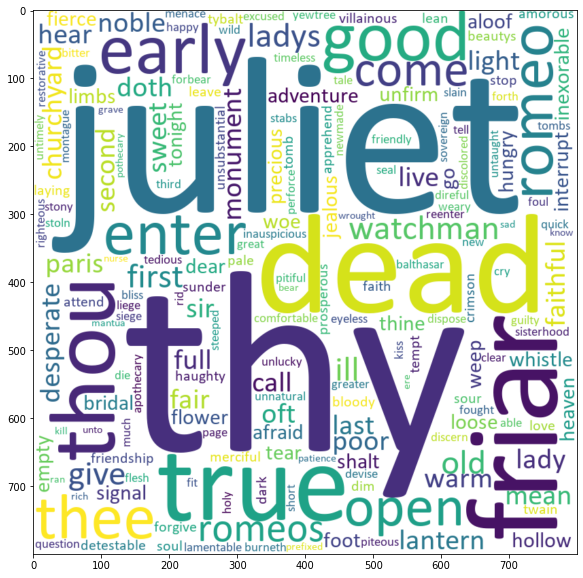

In [ ]:
'''data를 array형태로 바꾸지 않고, imshow에 wordcloud를 넣어서 워드클라우드를 만드는코드 -> 훨씬 더 간단하다.'''
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud.png')

# 감성 분석 코드

In [ ]:
import glob
from afinn import Afinn

## Afinn 긍부정 감정 지수 찍어보기

In [ ]:
afinn = Afinn()

In [ ]:
afinn.score(lines)   # 슬픈장면답게 부정지수가 높게나옴부정지수가 높게나옴

-144.0

# NRC 감정사전 사용

In [ ]:
NRC=pd.read_csv('nrc.txt',engine="python",header=None,sep="\t")

NRC=NRC[(NRC != 0).all(1)]
NRC=NRC.reset_index(drop=True)

In [ ]:
p_stemmer = PorterStemmer()

In [ ]:
raw = lines.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words]

match_words = [x for x in stopped_tokens if x in list(NRC[0])]

In [ ]:
match_words[:10] # 사용된 감정 단어 확인

['boy',
 'aloof',
 'hollow',
 'ground',
 'afraid',
 'adventure',
 'sweet',
 'bridal',
 'woe',
 'dust']

In [ ]:
import numpy as np
emotion=[]
for i in match_words:
    temp=list(NRC.iloc[np.where(NRC[0] == i)[0],1])
    for j in temp:
        emotion.append(j)

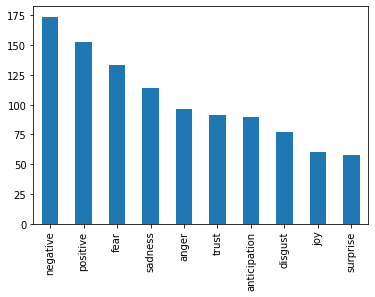

In [ ]:
sentiment_result1=pd.Series(emotion).value_counts()

sentiment_result1

sentiment_result1.plot.bar()